In [1]:
from chromo.models import Pythia8
from chromo.kinematics import FixedTarget, GeV
import boost_histogram as bh


In [4]:

kin = FixedTarget(1000 * GeV, "gamma", "p")

nevents = 1000

h = bh.Histogram(bh.axis.Regular(20, -10, 10), bh.axis.IntCategory([], growth=True), bh.axis.Integer(0, 2))
for iModel, Model in enumerate([Pythia8]):
    m = Model(kin, seed=1)
    for event in m(nevents):
        fs = event.final_state()
        h.fill(fs.eta, fs.pid, iModel)



 *------------------------------------------------------------------------------------* 
 |                                                                                    | 
 |  *------------------------------------------------------------------------------*  | 
 |  |                                                                              |  | 
 |  |                                                                              |  | 
 |  |   PPP   Y   Y  TTTTT  H   H  III    A      Welcome to the Lund Monte Carlo!  |  | 
 |  |   P  P   Y Y     T    H   H   I    A A     This is PYTHIA version 8.308      |  | 
 |  |   PPP     Y      T    HHHHH   I   AAAAA    Last date of change: 16 Nov 2022  |  | 
 |  |   P       Y      T    H   H   I   A   A                                      |  | 
 |  |   P       Y      T    H   H  III  A   A    Now is 29 Jan 2024 at 14:20:41    |  | 
 |  |                                                                              |  | 
 |  |   Program docu

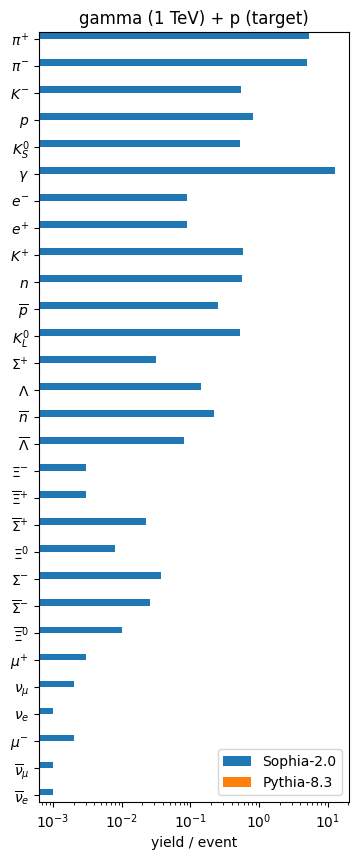

In [5]:
from matplotlib import pyplot as plt
import numpy as np
from particle import Particle

y = -np.arange(len(h.axes[1]))
plt.figure(figsize=(4, 10))
plt.barh(y + 0.125, h[sum, :, 0].values() / nevents, label="Sophia-2.0", height=0.25)
plt.barh(y - 0.125, h[sum, :, 1].values() / nevents, label="Pythia-8.3", height=0.25)
plt.yticks(y, (f"${Particle.from_pdgid(x).latex_name}$" for x in h.axes[1]))
plt.semilogx()
plt.legend()
plt.xlabel("yield / event")
plt.ylim(y[-1] - 0.25, y[0] + 0.25)
plt.title("gamma (1 TeV) + p (target)");